# Plotting orbits of two objects using numerical methods

## Konstantinos Doran SN:22007700

Introduction:
This notebook will be working through the week 4 assignment and begininning of my mini-project on complex orbital dynamics.
Date: 30/01/2024
Gravitational force on a mass, m1, at a point  r1 due to another mass, m2 at r2 is given by:
$$
\vec{F_1} = \frac{G m_1 m_2}{r_{12}^3} \vec{r_{12}}
$$
I first import the necessary libraries to start with:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(r1,r2,m1,m2):
    """Returns the gravitational force on a mass, m1, at a point r1, due to another mass, m2, at a point r2.
    
    Inputs:
    r1      position of first mass as a numpy array
    r2      position of second mass as a numpy array
    m1      mass of first object
    m2      mass of second object    
    Returns:
    f_on_m1 force on mass 1 as a numpy array
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    f_on_m1 = G*m1*m2/(np.sqrt((np.dot(r12,r12))**3))*r12
    return f_on_m1

## Simple tests: Euler

The Euler approximation:
$$
y(x+ \Delta x) = y(x) + \Delta x \frac{dy}{dx}
$$
I will be using this approximation to calculate the positions and velocities of two masses that exert gravitational forces on each other. 
From simple dynamics we can write velocity and acceleration as two coupled first-order equations:
$$
\frac{dx}{dt} = v
$$
$$
\frac{dv}{dt} = \frac{F}{m}
$$
From this, we can write our Euler approximations of position and velocity as:
$$
x(t+ \Delta t) = x(t) + \Delta t v(t)
$$
$$
v(t+ \Delta t) = v(t) + \Delta t \frac {F(t)}{m}
$$
I will use these approximations first where one body is kept fixed and a much smaller mass has its positions and velocites calculated.
Setting up potential and kinetic energies for both bodies, calculating energies at each time step.


Initial velocity of small object:

$$ \frac{m v^2}{r} = \frac{G m M}{r^2 }$$

rearranging for v and plugging in values:

$$ v = \sqrt{\frac{G M}{r}} = 1 $$

If our starting position is along the x axis at (1,0), then our velocity will have a direction parallel to the y-axis.

In [3]:
# Set up parameters
Ndim = 2     #2D problem for now
Nsteps = 15000
dt = 0.1
G = 1        # Appropriate units
m1 = 0.0001  # Small
m2 = 1.0     # Large
r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
# Set up storage for energies
u1 = np.zeros((Nsteps))
u2 = np.zeros((Nsteps))
k1 = np.zeros((Nsteps))
k2 = np.zeros((Nsteps))
totalE1 = np.zeros((Nsteps))
# Initial conditions
r1[0,:] = np.array((1,0))
v1[0,:] = np.array((0,1))
r2[0,:] = np.array((0,0))
v2[0,:] = np.array((0,0))
r12 = r2[0,:] - r1[0,:]
u1[0] = -G*m1*m2/np.sqrt(np.dot(r12,r12))
u2[0] = -G*m1*m2/np.sqrt(np.dot(r12,r12))
k1[0] = 0.5*m1*(np.dot(v1[0,:],v1[0,:]))
k2[0] = 0.5*m2*(np.dot(v2[0,:],v2[0,:]))
totalE1[0] = u1[0]+k1[0]

Had a few errors, were I initially set r1 = np.zeros((Ndim,Nsteps)) and similar for other arrays, so flipped them around. Then had an error where I tried defining r[0,0] = np.array((1,0)) which said setting an array element with a sequence so to remedy this I realised I needed to instead use r[0,:] = np.array((1,0)).

In [4]:
for i in range(Nsteps-1): # We calculate r, v at i+1
    f1 = force(r1[i,:],r2[i,:],m1,m2)
    # v1 at next step = v1 at this step + dt * dv/dt
    v1[i+1,:] = v1[i,:] + dt * f1/m1
    # r1 at next step = r1 at this step + dt * dr/dt
    r1[i+1,:] = r1[i,:] + dt * v1[i,:]
    # Calculate energies if calculating them during loop
    r12 = r2[i+1,:] - r1[i+1,:]
    u1[i+1] = -G*m1*m2/np.sqrt(np.dot(r12,r12))
    k1[i+1] = 0.5*m1*(np.dot(v1[i+1,:],v1[i+1,:]))
    totalE1[i+1] = u1[i+1]+k1[i+1]

Text(0.5, 1.0, 'Vertical position of $m_2$ over time')

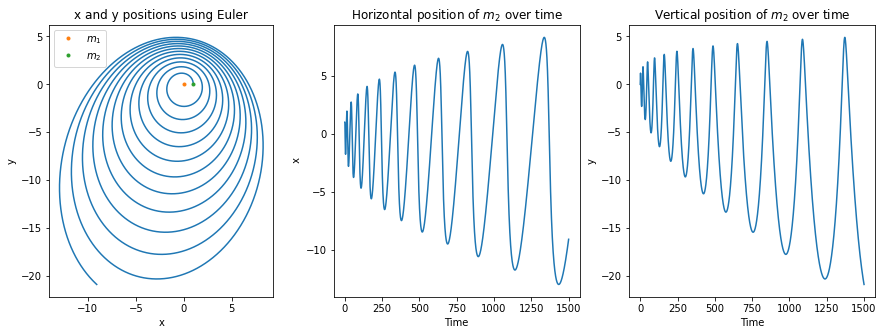

In [5]:
# Plot orbit either x vs y or x and y vs t
# If using x vs y, make the figure square: create a figure or set scaling
t_arr = np.linspace(0,Nsteps*dt,Nsteps)
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,3,1)
ax1.plot(r1[:,0],r1[:,1])
ax1.plot(r2[0,0],r2[0,1], ".", label=r"$m_1$")
ax1.plot(r1[0,0],r1[0,1], ".", label=r"$m_2$")
#ax1.plot(r2[0,0],r2[0,1], ".", label=r"$m_1$")
ax1.axis('scaled')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("x and y positions using Euler")
ax1.legend()
ax2 = fig1.add_subplot(1,3,2)
ax2.plot(t_arr,r1[:,0], label="x")
ax2.set_xlabel("Time")
ax2.set_ylabel(" x")
ax2.set_title(r"Horizontal position of $m_2$ over time")
ax3 = fig1.add_subplot(1,3,3)
ax3.plot(t_arr,r1[:,1], label="y")
ax3.set_xlabel("Time")
ax3.set_ylabel("y")
ax3.set_title(r"Vertical position of $m_2$ over time")

In [6]:
fig1.savefig("Euler dt too big.pdf")

In [7]:
#Repeat with smaller timestep
# Set up parameters
Ndim = 2     #2D problem for now
Nsteps = 15000
dt = 0.001
G = 1        # Appropriate units
m1 = 0.0001  # Small
m2 = 1.0     # Large
r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
# Set up storage for energies
u1 = np.zeros((Nsteps))
u2 = np.zeros((Nsteps))
k1 = np.zeros((Nsteps))
k2 = np.zeros((Nsteps))
totalE1 = np.zeros((Nsteps))
totalE2 = np.zeros((Nsteps))
# Initial conditions
r1[0,:] = np.array((1,0))
v1[0,:] = np.array((0,1))
r2[0,:] = np.array((0,0))
v2[0,:] = np.array((0,0))
r12 = r2[0,:] - r1[0,:]
u1[0] = -G*m1*m2/np.sqrt(np.dot(r12,r12))
u2[0] = -G*m1*m2/np.sqrt(np.dot(r12,r12))
k1[0] = 0.5*m1*(np.dot(v1[0,:],v1[0,:]))
k2[0] = 0.5*m2*(np.dot(v2[0,:],v2[0,:]))
totalE1[0] = u1[0]+k1[0]
totalE2[0] = u2[0]+k2[0]
#compute values at each timestep
for i in range(Nsteps-1): # We calculate r, v at i+1
    f1 = force(r1[i,:],r2[i,:],m1,m2)
    # v1 at next step = v1 at this step + dt * dv/dt
    v1[i+1,:] = v1[i,:] + dt * f1/m1
    # r1 at next step = r1 at this step + dt * dr/dt
    r1[i+1,:] = r1[i,:] + dt * v1[i,:]
    # Calculate energies if calculating them during loop
    r12 = r2[i+1,:] - r1[i+1,:]
    u1[i+1] = -G*m1*m2/np.sqrt(np.dot(r12,r12))
    k1[i+1] = 0.5*m1*(np.dot(v1[i+1,:],v1[i+1,:]))
    u2[i+1] = -G*m1*m2/np.sqrt(np.dot(r12,r12))
    k2[i+1] = 0.5*m1*(np.dot(v2[i+1,:],v2[i+1,:]))
    totalE1[i+1] = u1[i+1]+k1[i+1]
    totalE2[i+1] = u2[i+1]+k2[i+1]

Text(0.5, 1.0, 'Vertical position of $m_2$ over time')

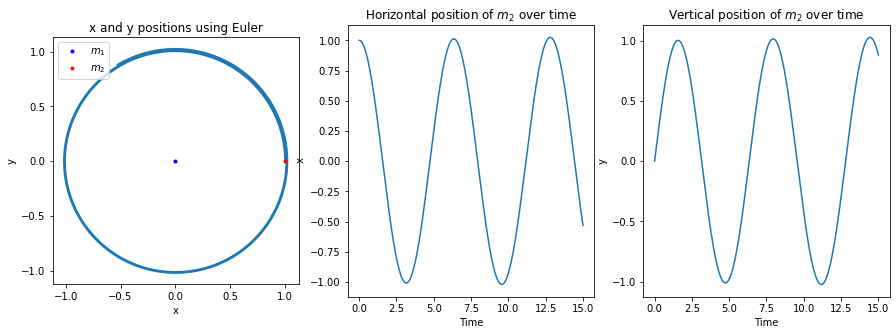

In [8]:
# Plot orbit either x vs y or x and y vs t
# If using x vs y, make the figure square: create a figure or set scaling
t_arr = np.linspace(0,Nsteps*dt,Nsteps)
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,3,1)
ax1.plot(r1[:,0],r1[:,1])
ax1.plot(r2[0,0],r2[0,1], ".", label=r"$m_1$", color='b')
ax1.plot(r1[0,0],r1[0,1], ".", label=r"$m_2$", color='r')
#ax1.plot(r2[0,0],r2[0,1], ".", label=r"$m_1$")
ax1.axis('scaled')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("x and y positions using Euler")
ax1.legend(loc="upper left")
ax2 = fig1.add_subplot(1,3,2)
ax2.plot(t_arr,r1[:,0], label="x")
ax2.set_xlabel("Time")
ax2.set_ylabel(" x")
ax2.set_title(r"Horizontal position of $m_2$ over time")
ax3 = fig1.add_subplot(1,3,3)
ax3.plot(t_arr,r1[:,1], label="y")
ax3.set_xlabel("Time")
ax3.set_ylabel("y")
ax3.set_title(r"Vertical position of $m_2$ over time")

In [9]:
fig1.savefig("Euler stable orbit.pdf")

With dt set to 0.1 the circular orbit instead becomes a spiral that gradually grows in radius. Setting dt to 0.01 reduces the rate at which the radius increases however it is still increasing instead of staying constant. When using dt to 0.001 the orbit becomes almost spherical however the number of points needed to make this approximation accurate is far too many. As the time it takes to run the for loop is now 0.2 seconds which is considerable and we have not even calculated the change in the orbit of the larger body.

Angular momentum is defined as:

$$ \vec{L} = \vec{r} \times \vec{p} = m (\vec{r} \times \vec{v})$$

However the cross product in 2D is a scalar, which is plotted below along with the total energy

Text(0.5, 1.0, 'Potential Energy over time')

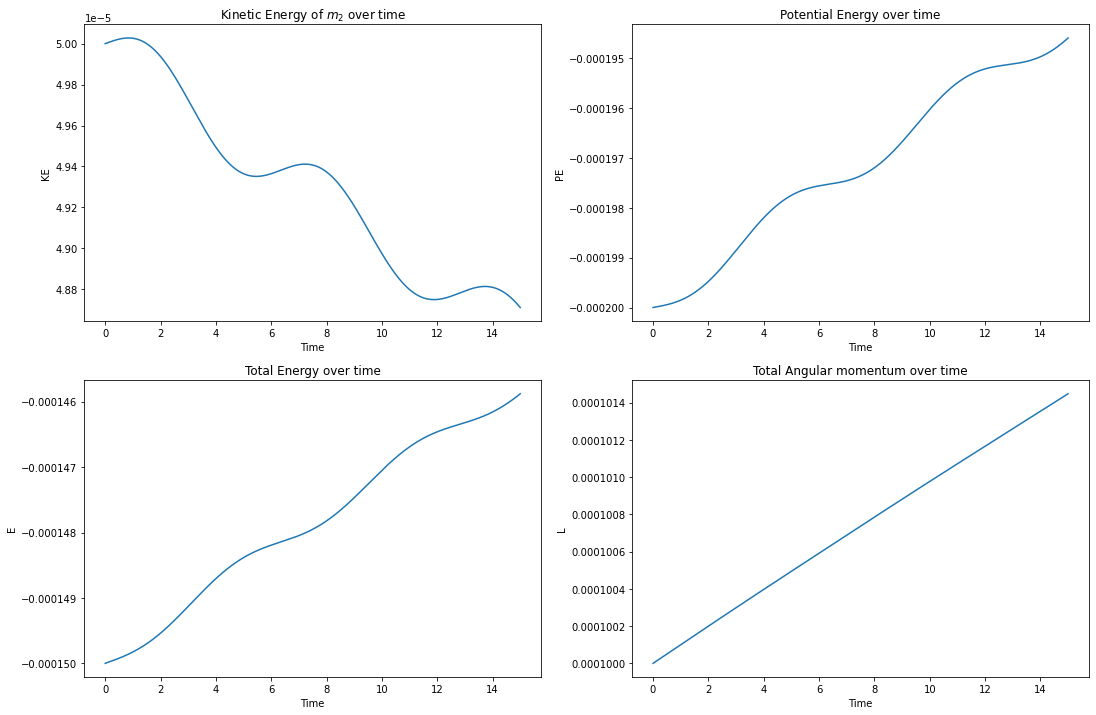

In [10]:
# Plot some kind of energy (calculate if necessary) vs t
fig2 = plt.figure(figsize=(18,12))
#fig2.tight_layout()
ax1 = fig2.add_subplot(2,2,3)
ax1.plot(t_arr, totalE1+totalE2)
ax1.set_xlabel("Time")
ax1.set_ylabel("E")
ax1.set_title("Total Energy over time")

# Plot angular momentum vs t
L1 = np.cross(r1, v1) * m1
ax2 = fig2.add_subplot(2,2,4)
ax2.plot(t_arr,L1)
ax2.set_xlabel("Time")
ax2.set_ylabel("L")
ax2.set_title("Total Angular momentum over time")

#plot KE vs t
ax3 = fig2.add_subplot(2,2,1)
ax3.plot(t_arr, k1)
ax3.set_xlabel("Time")
ax3.set_ylabel("KE")
ax3.set_title("Kinetic Energy of $m_2$ over time")
#plot PE vs t
ax3 = fig2.add_subplot(2,2,2)
ax3.plot(t_arr, u1+u2)
ax3.set_xlabel("Time")
ax3.set_ylabel("PE")
ax3.set_title("Potential Energy over time")

In [11]:
fig2.savefig("Euler energy and momentum.pdf")


Clearly Euler's approximation method has too large of an error that even with small timesteps, conserved quantities such as angular momentum and total energy increase over time. The rate of this increase is proportional to the size of the time step. Furthermore, the time step also affects how quickly the orbit becomes unstable using this approximation method, even though the orbit should be perfectly circular the approximation method struggles to simulate this.

## More reliable: velocity Verlet

The velocity Verlet method, contrasry to Euler's approach includes more terms to create a better approximation. The new equations for our position and velocity are as follows:
$$
x(t+ \Delta t) = x(t) + \Delta t v(t) + \Delta t^{2} \frac {F(t)}{2m}
$$
$$
v(t+ \Delta t) = v(t) + \Delta t \frac {F(t) + F(t + \Delta t)}{2m}
$$

Using this new method, I will also now increase the complexity and allow both bodies to have circular orbits around their centre of mass. The equation for the centre of mass position is:
$$
\vec{r_{COM}} = \frac{(m_1 \vec{r_1} + m_2 \vec{r_2})}{m_1 + m_2}
$$
Setting this to 0 and aligning the masses along the x axis, I wanted the distance between the bodies to be 1, so using $ |x_1 - x_2| = 1$ and the equation for the centre of mass to find the positions of each mass. For the velocities I used the equation:
$$
\frac{m_1 v_1^2}{r_1} = \frac {G m_1 m_2}{r_{12}^2}
$$
where $r_1$ is the distance to the origin and $r_{12}$ is the distance between the bodies.
I then rearranged and solved these for each body to find their velocities

In [12]:
# Set up number of steps, masses, timestep again (use new variable names)
Nsteps_verlet = 100
dt_verlet = 0.2
m1_verlet = 0.5  # Small
m2_verlet = 1.0     # Large
# Storage for positions, velocities etc (again, use new names)
r1_verlet = np.zeros((Nsteps_verlet,Ndim))
r2_verlet = np.zeros((Nsteps_verlet,Ndim))
v1_verlet = np.zeros((Nsteps_verlet,Ndim))
v2_verlet = np.zeros((Nsteps_verlet,Ndim))
# Set up storage for energies
u1_verlet = np.zeros((Nsteps_verlet))
u2_verlet = np.zeros((Nsteps_verlet))
k1_verlet = np.zeros((Nsteps_verlet))
k2_verlet = np.zeros((Nsteps_verlet))
totalE1_verlet = np.zeros((Nsteps_verlet))
totalE2_verlet = np.zeros((Nsteps_verlet))
# Initial conditions
r1_verlet[0,:] = np.array((-2/3,0))
v1_verlet[0,:] = np.array((0,np.sqrt(2/3)))
r2_verlet[0,:] = np.array((1/3,0))
v2_verlet[0,:] = np.array((0,-np.sqrt(1/6)))
r12_verlet = r2_verlet[0,:] - r1_verlet[0,:]
u1_verlet[0] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
u2_verlet[0] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
k1_verlet[0] = 0.5*m1_verlet*(np.dot(v1_verlet[0,:], v1_verlet[0,:]))
k2_verlet[0] = 0.5*m2_verlet*(np.dot(v2_verlet[0,:],v2_verlet[0,:]))
totalE1_verlet[0] = u1_verlet[0]+k1_verlet[0]
totalE2_verlet[0] = u2_verlet[0]+k2_verlet[0]

In [13]:
for i in range(Nsteps_verlet-1):
    # Find forces on masses at this timestep
    f1 = force(r1_verlet[i,:],r2_verlet[i,:],m1_verlet,m2_verlet)
    f2 = -f1
    # Update positions using velocity Verlet
    r1_verlet[i+1,:] = r1_verlet[i,:] + dt_verlet*v1_verlet[i,:] + (dt_verlet**2)*f1/(2*m1_verlet)
    r2_verlet[i+1,:] = r2_verlet[i,:] + dt_verlet*v2_verlet[i,:] + (dt_verlet**2)*f2/(2*m2_verlet)
    # Find forces at new timestep (remember that you have to store previous forces)
    f1new = force(r1_verlet[i+1,:],r2_verlet[i+1,:],m1_verlet,m2_verlet)
    f2new = -f1new
    # Update velocities using velocity Verlet
    v1_verlet[i+1,:] = v1_verlet[i,:] + dt_verlet*(f1 + f1new)/(2*m1_verlet)
    v2_verlet[i+1,:] = v2_verlet[i,:] + dt_verlet*(f2 + f2new)/(2*m2_verlet)
    # Store energies
    r12_verlet = r2_verlet[i+1,:] - r1_verlet[i+1,:]
    u1_verlet[i+1] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
    u2_verlet[i+1] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
    k1_verlet[i+1] = 0.5*m1_verlet*(np.dot(v1_verlet[i+1,:],v1_verlet[i+1,:]))
    k2_verlet[i+1] = 0.5*m2_verlet*(np.dot(v2_verlet[i+1,:],v2_verlet[i+1,:]))
    totalE1_verlet[i+1] = u1_verlet[i+1]+k1_verlet[i+1]
    totalE2_verlet[i+1] = u2_verlet[i+1]+k2_verlet[i+1]

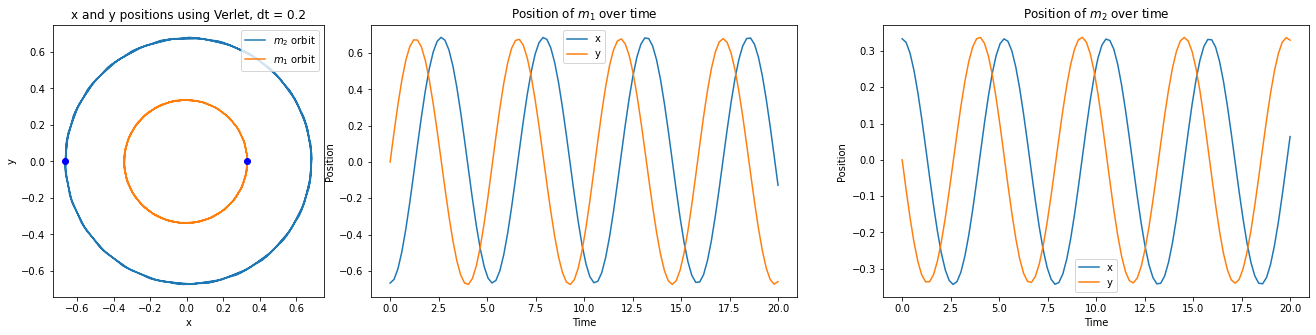

In [14]:
# Plot orbit, energies, angular momentum again
t_arr = np.linspace(0,Nsteps_verlet*dt_verlet,Nsteps_verlet)
fig3 = plt.figure(figsize=(26,5))
ax1 = fig3.add_subplot(1,2,1)
ax1.plot(r1_verlet[:,0],r1_verlet[:,1], label=r"$m_2$ orbit")
ax1.plot(r2_verlet[:,0],r2_verlet[:,1], label=r"$m_1$ orbit" )
ax1.plot(r2_verlet[0,0],r2_verlet[0,1], "o", color='b')
ax1.plot(r1_verlet[0,0],r1_verlet[0,1], "o" , color='b')
ax1.legend(loc="upper right")
ax1.axis('scaled')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("x and y positions using Verlet, dt = 0.2")
ax2 = fig3.add_subplot(1,3,2)
ax2.plot(t_arr,r1_verlet[:,0], label="x")
ax2.plot(t_arr,r1_verlet[:,1], label="y")
ax2.set_xlabel("Time")
ax2.set_ylabel("Position")
ax2.set_title("Position of $m_1$ over time")
ax2.legend()
ax3 = fig3.add_subplot(1,3,3)
ax3.plot(t_arr,r2_verlet[:,0], label="x")
ax3.plot(t_arr,r2_verlet[:,1], label="y")
ax3.set_xlabel("Time")
ax3.set_ylabel("Position")
ax3.set_title("Position of $m_2$ over time")
ax3.legend()


In [15]:
fig3.savefig("Verlet orbit large dt.pdf")

In [16]:
# Set up number of steps, masses, timestep again (use new variable names)
Nsteps_verlet = 2000
dt_verlet = 0.01
m1_verlet = 0.5  # Small
m2_verlet = 1.0     # Large
# Storage for positions, velocities etc (again, use new names)
r1_verlet = np.zeros((Nsteps_verlet,Ndim))
r2_verlet = np.zeros((Nsteps_verlet,Ndim))
v1_verlet = np.zeros((Nsteps_verlet,Ndim))
v2_verlet = np.zeros((Nsteps_verlet,Ndim))
# Set up storage for energies
u1_verlet = np.zeros((Nsteps_verlet))
u2_verlet = np.zeros((Nsteps_verlet))
k1_verlet = np.zeros((Nsteps_verlet))
k2_verlet = np.zeros((Nsteps_verlet))
totalE1_verlet = np.zeros((Nsteps_verlet))
totalE2_verlet = np.zeros((Nsteps_verlet))
# Initial conditions
r1_verlet[0,:] = np.array((-2/3,0))
v1_verlet[0,:] = np.array((0,np.sqrt(2/3)))
r2_verlet[0,:] = np.array((1/3,0))
v2_verlet[0,:] = np.array((0,-np.sqrt(1/6)))
r12_verlet = r2_verlet[0,:] - r1_verlet[0,:]
u1_verlet[0] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
u2_verlet[0] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
k1_verlet[0] = 0.5*m1_verlet*(np.dot(v1_verlet[0,:], v1_verlet[0,:]))
k2_verlet[0] = 0.5*m2_verlet*(np.dot(v2_verlet[0,:],v2_verlet[0,:]))
totalE1_verlet[0] = u1_verlet[0]+k1_verlet[0]
totalE2_verlet[0] = u2_verlet[0]+k2_verlet[0]

for i in range(Nsteps_verlet-1):
    # Find forces on masses at this timestep
    f1 = force(r1_verlet[i,:],r2_verlet[i,:],m1_verlet,m2_verlet)
    f2 = -f1
    # Update positions using velocity Verlet
    r1_verlet[i+1,:] = r1_verlet[i,:] + dt_verlet*v1_verlet[i,:] + (dt_verlet**2)*f1/(2*m1_verlet)
    r2_verlet[i+1,:] = r2_verlet[i,:] + dt_verlet*v2_verlet[i,:] + (dt_verlet**2)*f2/(2*m2_verlet)
    # Find forces at new timestep (remember that you have to store previous forces)
    f1new = force(r1_verlet[i+1,:],r2_verlet[i+1,:],m1_verlet,m2_verlet)
    f2new = -f1new
    # Update velocities using velocity Verlet
    v1_verlet[i+1,:] = v1_verlet[i,:] + dt_verlet*(f1 + f1new)/(2*m1_verlet)
    v2_verlet[i+1,:] = v2_verlet[i,:] + dt_verlet*(f2 + f2new)/(2*m2_verlet)
    # Store energies
    r12_verlet = r2_verlet[i+1,:] - r1_verlet[i+1,:]
    u1_verlet[i+1] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
    u2_verlet[i+1] = -G*m1_verlet*m2_verlet/np.linalg.norm(r12_verlet)
    k1_verlet[i+1] = 0.5*m1_verlet*(np.dot(v1_verlet[i+1,:],v1_verlet[i+1,:]))
    k2_verlet[i+1] = 0.5*m2_verlet*(np.dot(v2_verlet[i+1,:],v2_verlet[i+1,:]))
    totalE1_verlet[i+1] = u1_verlet[i+1]+k1_verlet[i+1]
    totalE2_verlet[i+1] = u2_verlet[i+1]+k2_verlet[i+1]


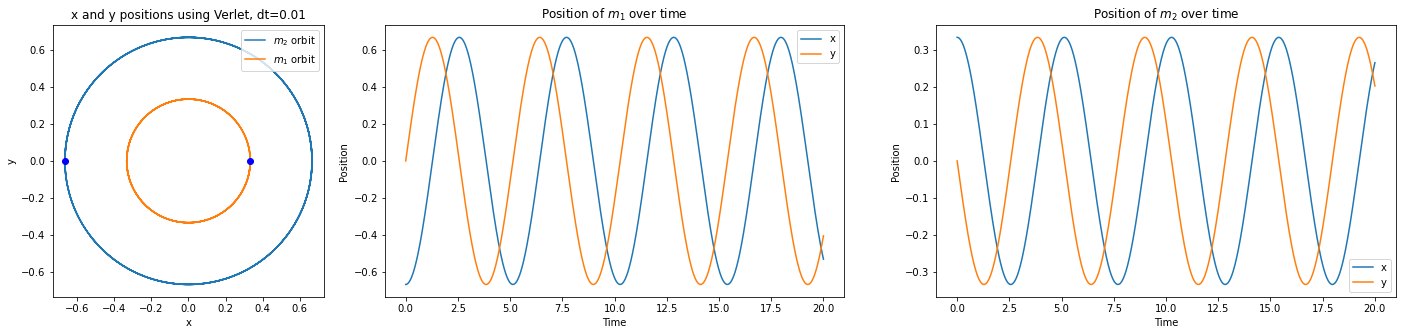

In [17]:
# Plot orbit, energies, angular momentum again
t_arr = np.linspace(0,Nsteps_verlet*dt_verlet,Nsteps_verlet)
fig3 = plt.figure(figsize=(28,5))
ax1 = fig3.add_subplot(1,2,1)
ax1.plot(r1_verlet[:,0],r1_verlet[:,1], label=r"$m_2$ orbit")
ax1.plot(r2_verlet[:,0],r2_verlet[:,1], label=r"$m_1$ orbit")
ax1.plot(r2_verlet[0,0],r2_verlet[0,1], "o", color='b')
ax1.plot(r1_verlet[0,0],r1_verlet[0,1], "o" , color='b')
ax1.legend(loc="upper right")
ax1.axis('scaled')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("x and y positions using Verlet, dt=0.01")
ax2 = fig3.add_subplot(1,3,2)
ax2.plot(t_arr,r1_verlet[:,0], label="x")
ax2.plot(t_arr,r1_verlet[:,1], label="y")
ax2.set_xlabel("Time")
ax2.set_ylabel("Position")
ax2.set_title("Position of $m_1$ over time")
ax2.legend()
ax3 = fig3.add_subplot(1,3,3)
ax3.plot(t_arr,r2_verlet[:,0], label="x")
ax3.plot(t_arr,r2_verlet[:,1], label="y")
ax3.set_xlabel("Time")
ax3.set_ylabel("Position")
ax3.set_title("Position of $m_2$ over time")
ax3.legend() 

In [18]:
fig3.savefig("Verlet orbit small dt.pdf")

The velocity verlet approximation clearly exhibits better stability in the approximation when using a larger timestep of dt = 0.2, where the approximation is more apparent but decreasing the timestep to 0.01 provides an equally, if not more accurate prediction as the Euler approximation with 20000 steps compared to 2000 steps.

[-0.75       -0.75       -0.74999999 ... -0.74999589 -0.74999603
 -0.74999617]


Text(0.5, 1.0, 'Total Energy against time using velocity Verlet')

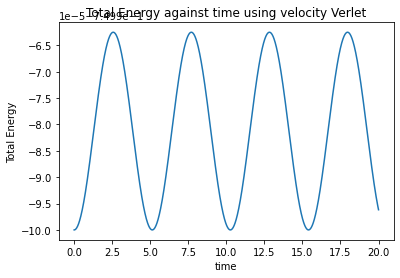

In [19]:
totalE_verlet = totalE1_verlet+totalE2_verlet
print(totalE_verlet)
plt.plot(t_arr, totalE_verlet)
plt.xlabel("time")
plt.ylabel("Total Energy")
plt.title("Total Energy against time using velocity Verlet")

[-0.40824829 -0.40824829 -0.40824829 ... -0.40824829 -0.40824829
 -0.40824829]


Text(0.5, 1.0, 'Total Angular momentum using velocity Verlet')

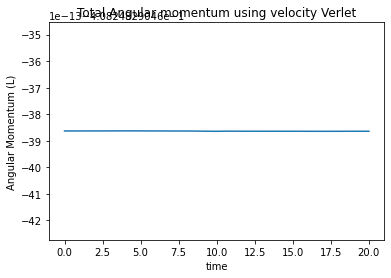

In [20]:
L1verlet = np.cross(r1_verlet, v1_verlet)*m1_verlet
L2verlet = np.cross(r2_verlet, v2_verlet)*m2_verlet

TotalLverlet = L1verlet + L2verlet
print(TotalLverlet)
plt.plot(t_arr,TotalLverlet)
plt.xlabel("time")
plt.ylabel("Angular Momentum (L)")
plt.title("Total Angular momentum using velocity Verlet")

Text(1.0, 1.0, 'Total Potential Energy over time')

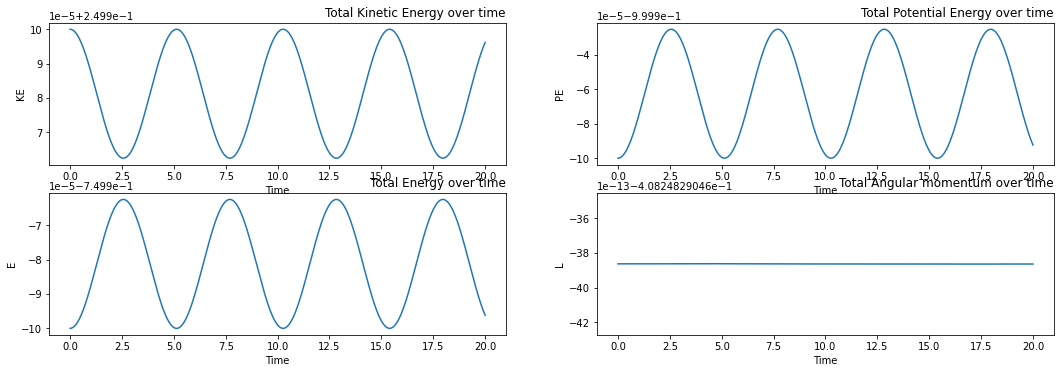

In [41]:
# Plot some kind of energy (calculate if necessary) vs t
fig2 = plt.figure(figsize=(18,12))
fig2.tight_layout()
ax1 = fig2.add_subplot(4,2,3)
ax1.plot(t_arr, totalE_verlet)
ax1.set_xlabel("Time")
ax1.set_ylabel("E")
ax1.set_title("Total Energy over time", loc = "right")

# Plot angular momentum vs t
ax2 = fig2.add_subplot(4,2,4)
ax2.plot(t_arr,TotalLverlet)
ax2.set_xlabel("Time")
ax2.set_ylabel("L")
ax2.set_title("Total Angular momentum over time", loc = "right")

#plot KE vs t
ax3 = fig2.add_subplot(4,2,1)
ax3.plot(t_arr, k1_verlet+k2_verlet)
ax3.set_xlabel("Time")
ax3.set_ylabel("KE")
ax3.set_title("Total Kinetic Energy over time", loc = "right")

#plot PE vs t
ax4 = fig2.add_subplot(4,2,2)
ax4.plot(t_arr, u1_verlet+u2_verlet)
ax4.set_xlabel("Time")
ax4.set_ylabel("PE")
ax4.set_title("Total Potential Energy over time", loc = "right")

In [39]:
fig2.savefig("Verlet energy and momentum.pdf")

In [23]:
meanenergy = np.mean(totalE_verlet)
sdenergy = np.std(totalE_verlet)
print(meanenergy, sdenergy)

-0.7499807956500463 1.3120423519428137e-05


In [24]:
meanL = np.mean(TotalLverlet)
sdL = np.std(TotalLverlet)
print(meanL, sdL)

-0.40824829046386346 6.153993865842422e-16




Interestingly, the velocity verlet method does not conserve total energy, but rather it fluctuates as a sine wave, while the total angular momentum is conserved. Compared to Euler, where both quantities were increasing, this approach is better for conserving at least one of the quantities and also requiring less computational power and time to compute in order to reach a better accuracy.